In [88]:
import skny as sk
import stlearn as st
import scanpy as sc
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd

In [2]:
xenium_path = "/Volumes/Project/home/sakai/CODEX/data/breast_sample"

In [25]:
# Load public data (breast)
adata = st.ReadXenium(feature_cell_matrix_file=f"{xenium_path}/cell_feature_matrix.h5",
                     cell_summary_file=f"{xenium_path}/cells.csv.gz",
                     library_id="example of Xeniuma data",
                     image_path=None,
                     scale=1,
                     spot_diameter_fullres=10
                     )

# Gridding at 10μm interval
N_COL = int((adata.obs.imagecol.max() - adata.obs.imagecol.min()) / 10)
N_ROW = int((adata.obs.imagerow.max() - adata.obs.imagerow.min()) / 10)
grid = st.tl.cci.grid(adata, n_row=N_ROW, n_col=N_COL, n_cpus=30, verbose=False)

In [26]:
grid = sk.pp.calculate_distance(
    grid, pos_marker_ls=['CDH1'], 
)

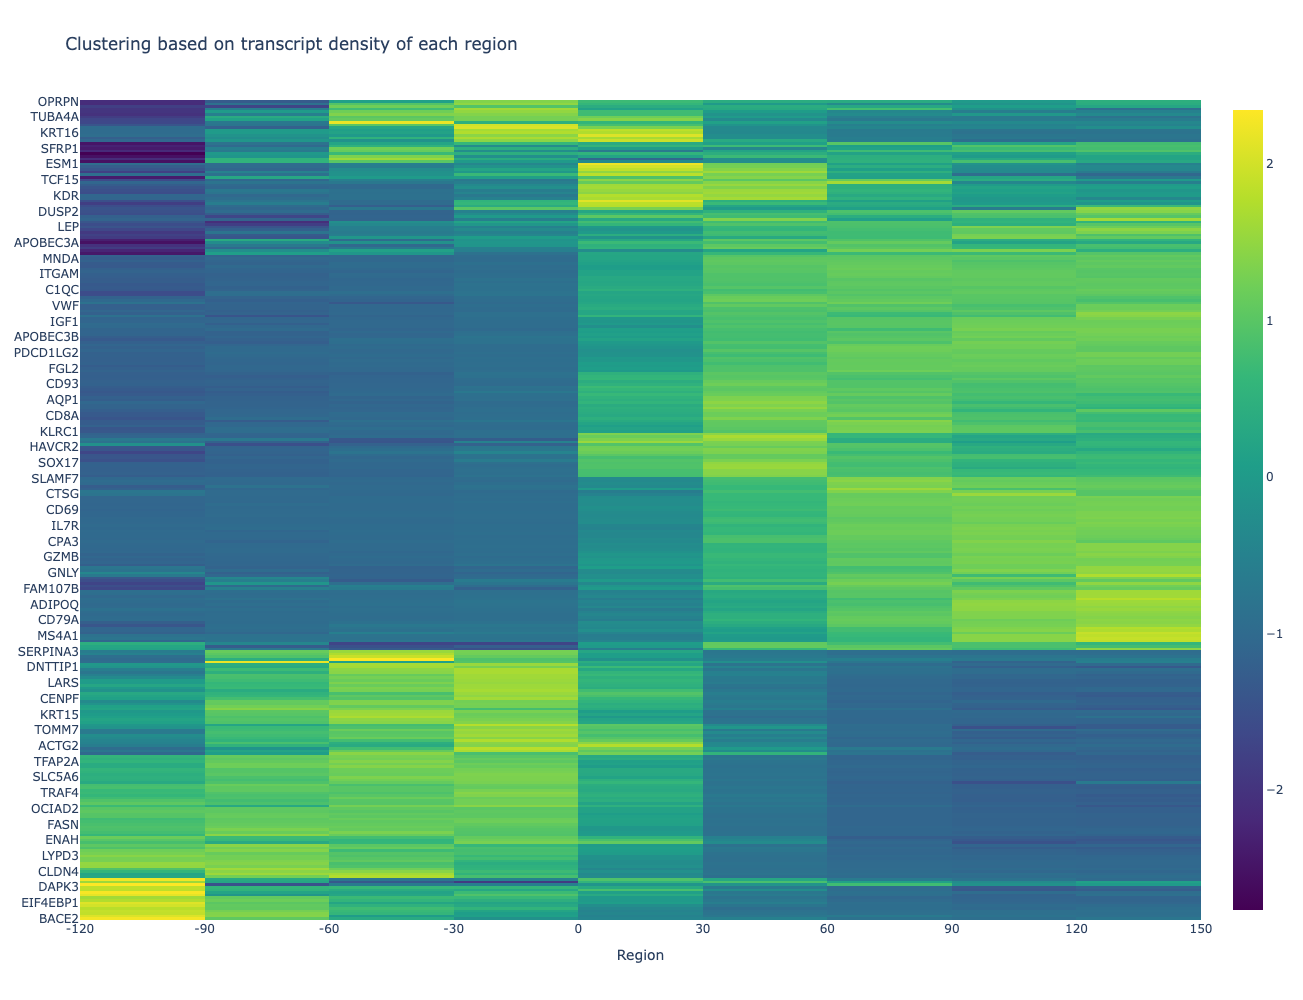

In [54]:
sk.pl.clustering_heatmap(grid)

In [130]:
solid = sk.pp.convert_indivisual_solid(grid)

/Users/sakai/miniconda3/envs/skny/lib/python3.8/site-packages/anndata/_core/anndata.py:864: UserWarning:


AnnData expects .obs.index to contain strings, but got values like:
    [2, 3, 4, 5, 7]

    Inferred to be: integer


/Users/sakai/miniconda3/envs/skny/lib/python3.8/site-packages/anndata/_core/anndata.py:788: UserWarning:


AnnData expects .obs.index to contain strings, but got values like:
    [2, 3, 4, 5, 7]

    Inferred to be: integer




In [122]:
solid.layers["counts"] = solid.X.copy()
sc.pp.normalize_total(solid)
sc.pp.log1p(solid)
sc.pp.pca(solid)
sc.pp.neighbors(solid)
sc.tl.umap(solid)
sc.tl.leiden(solid)

/Users/sakai/miniconda3/envs/skny/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



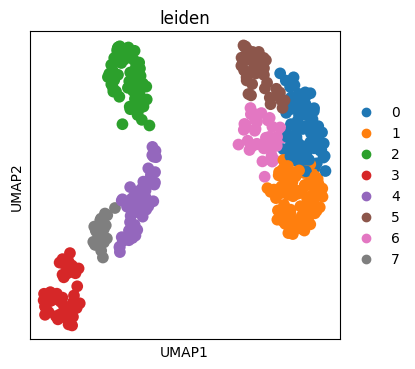

In [123]:
#with plt.rc_context({"figure.figsize": (8, 8), "figure.dpi": (300)}):

fig, ax = plt.subplots(figsize=(4, 4))

ax = sc.pl.umap(
    solid,
    color=[
        "leiden",
    ],
    wspace=0.4,
    ax=ax)

#plt.savefig("breast_solid_umap.png", dpi=500)

In [124]:
solid.obs.leiden.unique()

['3', '0', '7', '6', '1', '4', '2', '5']
Categories (8, object): ['0', '1', '2', '3', '4', '5', '6', '7']

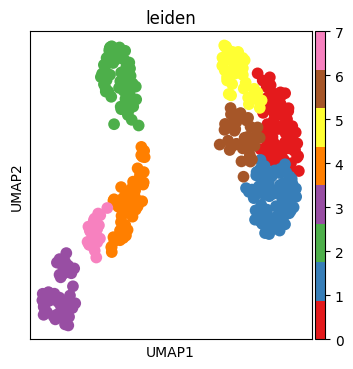

In [125]:
#with plt.rc_context({"figure.figsize": (8, 8), "figure.dpi": (300)}):
solid.obs["leiden"] = solid.obs["leiden"].astype(float)
fig, ax = plt.subplots(figsize=(4, 4))
cmap = matplotlib.cm.Set1
cmap.N = len(solid.obs["leiden"].unique())
#cmap.N = 8
ax = sc.pl.umap(
    solid,
    color=[
        #"solid",
        "leiden",
    ],
    wspace=0.4,
    ax=ax, 
    cmap=cmap, )

In [126]:
df_shotest = solid.uns["shortest"]

In [127]:
df_solid = solid.obs
df_solid = df_solid.reset_index(drop=True)

In [128]:
df_shotest = pd.merge(df_shotest, df_solid, on="solid", how="left")

(-0.5, 751.5, 546.5, -0.5)

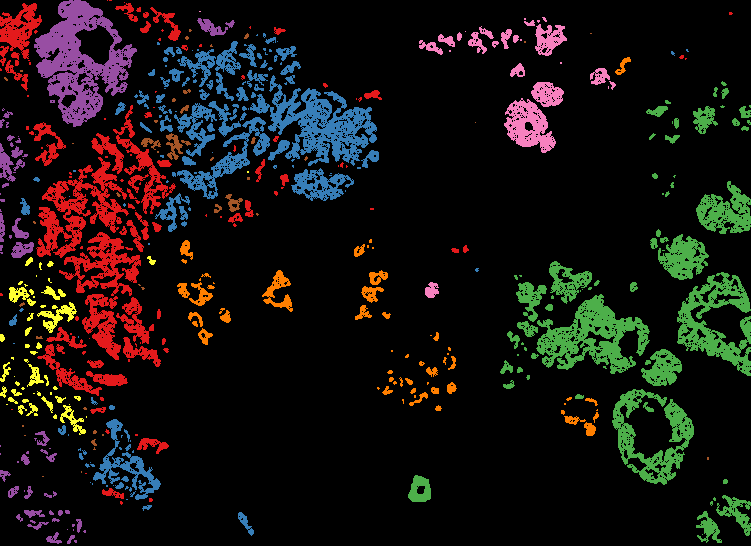

In [129]:
# save figure
fig, ax = plt.subplots(figsize=(N_COL, N_ROW), dpi=1, tight_layout=True)

image = np.array(df_shotest["leiden"].astype(float).fillna(-1)).reshape(N_ROW, N_COL)
cmap = matplotlib.cm.Set1
cmap.set_bad('black',1.)
cmap.set_under(color='black') 

ax.imshow(
    image, cmap=cmap,
    vmin=0,
    vmax=8,
)
ax.axis('off')
#plt.savefig("cluster.png")